In [2]:
from tensorflow.keras.applications import MobileNetV2, VGG16
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomContrast, Rescaling
import pathlib

In [2]:
data_dir = '/kaggle/input/immunoquest1/Dataset/Dataset'

In [3]:
batch_size = 32
image_size = (224, 224)

In [4]:
train_data = image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True
)

val_data = image_dataset_from_directory(
    os.path.join(data_dir, 'val'),
    batch_size = batch_size,
    image_size = image_size,
    shuffle=False
)

Found 3984 files belonging to 5 classes.
Found 496 files belonging to 5 classes.


In [5]:
augmentation = tf.keras.Sequential([RandomFlip("horizontal"), # Randomly flips images in horizontal
                                    RandomRotation(0.1),    # Randomly rotates images at some degrees in horizontal
                                    RandomTranslation(0.1, 0.1), # Randomly makes translations on images at some degrees in horizontal
                                    RandomContrast(0.2)]) # Adds Contrast in the image 

normalization = Rescaling(1./255)

In [6]:
def preprocess_dataset(dataset):    
    return dataset.map(lambda x, y: (augmentation(x, training=True), y)).map(lambda x, y: (normalization(x), y))

In [7]:
train_data = preprocess_dataset(train_data)
val_data = preprocess_dataset(val_data)
train_dir = pathlib.Path(os.path.join(data_dir, 'train'))

Cause: could not parse the source code of <function preprocess_dataset.<locals>.<lambda> at 0x7cbf78304430>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (normalization(x), y)

Match 1:
lambda x, y: (augmentation(x, training=True), y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function preprocess_dataset.<locals>.<lambda> at 0x7cbf81768790>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (normalization(x), y)

Match 1:
lambda x, y: (augmentation(x, training=True), y)

To silence this warning, decorate the function with @tf.autograph.experimental.d

In [8]:
class_names = ['baso', 'eosi', 'lymp', 'mono', 'neut']

num_classes = 5

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
base_model.trainable = True
for layer in base_model.layers[:-10]:      
    layer.trainable = False

In [26]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax')(x)

In [27]:
model = Model(inputs=base_model.input, outputs=x)

In [28]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(train_data, validation_data=val_data, callbacks=callbacks, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 464ms/step - accuracy: 0.2883 - loss: 1.5978 - val_accuracy: 0.5464 - val_loss: 1.2897
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 426ms/step - accuracy: 0.5076 - loss: 1.2704 - val_accuracy: 0.6069 - val_loss: 1.1177
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 411ms/step - accuracy: 0.5838 - loss: 1.1133 - val_accuracy: 0.6391 - val_loss: 0.9796
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 424ms/step - accuracy: 0.6263 - loss: 1.0070 - val_accuracy: 0.6935 - val_loss: 0.8837
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 424ms/step - accuracy: 0.6505 - loss: 0.9449 - val_accuracy: 0.6956 - val_loss: 0.8257
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 420ms/step - accuracy: 0.6700 - loss: 0.8758 - val_accuracy: 0.7379 - val_loss: 0.7549
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 412ms/step - accuracy: 0.6999 - loss: 0.8097 - val_accuracy: 0.7419 - val_loss: 0.7454
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 414ms/step - accuracy: 0.6934 - loss: 0

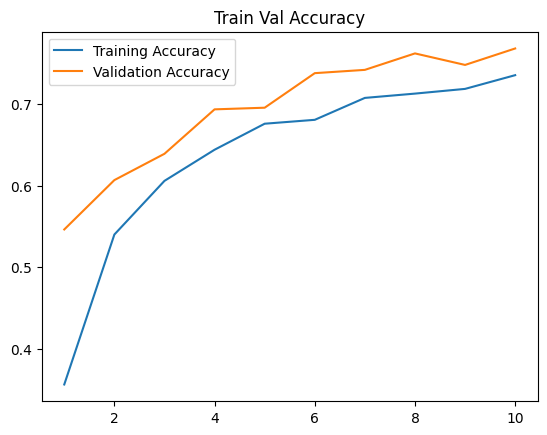

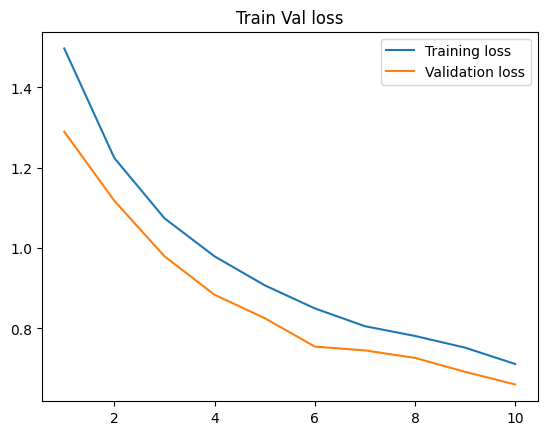

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Train Val Accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Train Val loss')
plt.legend()

In [10]:
base_model_1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_1.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
base_model_1.trainable = True
for layer in base_model_1.layers[:-10]:      
    layer.trainable = False

In [12]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [13]:
x = GlobalAveragePooling2D()(base_model_1.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

In [14]:
model_1 = Model(inputs=base_model_1.input, outputs=x)

In [15]:
model_1.compile(optimizer=Adam(learning_rate=0.00001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model_1.fit(train_data, validation_data=val_data, callbacks=callbacks, epochs=5)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 551ms/step - accuracy: 0.2319 - loss: 1.8514 - val_accuracy: 0.2278 - val_loss: 1.8188
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 459ms/step - accuracy: 0.4046 - loss: 1.4134 - val_accuracy: 0.3306 - val_loss: 1.5642
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 58s 464ms/step - accuracy: 0.5213 - loss: 1.2077 - val_accuracy: 0.4355 - val_loss: 1.3584
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 454ms/step - accuracy: 0.5965 - loss: 1.0762 - val_accuracy: 0.5383 - val_loss: 1.1529
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 58s 465ms/step - accuracy: 0.6375 - loss: 0.9828 - val_accuracy: 0.6169 - val_loss: 0.9875


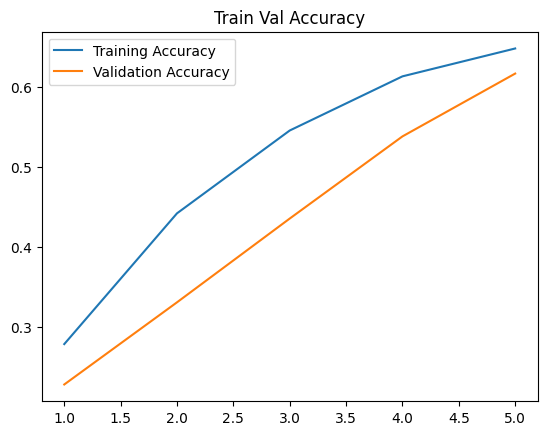

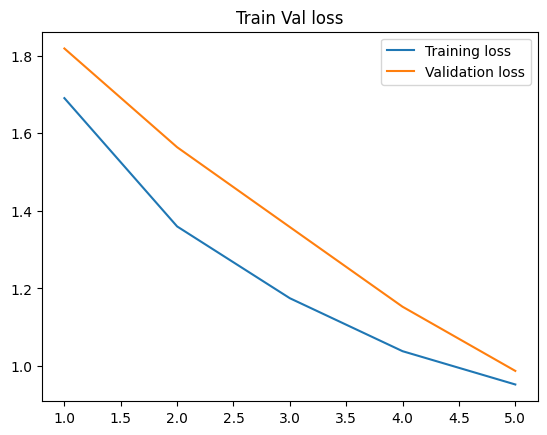

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Train Val Accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Train Val loss')
plt.legend()

In [21]:
model_1.save('mobileNetV2.h5')

In [ ]:
def load_test_images(test_dir):
    test_images = []
    test_filenames = []
    
    image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    for img_name in image_files:
        img_path = os.path.join(test_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        image = image.resize(img_size)
        image = np.array(image) / 255.0
        test_images.append(image)
        test_filenames.append(img_name)

    return np.array(test_images), test_filenames

In [ ]:
test_dir = '/kaggle/input/immunoquest1/Dataset/Dataset/test'
test_images, test_filenames = load_test_images(test_dir)

test_images_tensor = np.array(test_images)

# Get Predictions
test_predictions = model.predict(test_images_tensor)
test_pred_labels = np.argmax(test_predictions, axis=1)

a = [os.path.splitext(filename)[0] for filename in test_filenames]

# Create DataFrames for submission
submission_macro = pd.DataFrame({'ID': a, 'label': test_pred_labels})

submission_macro.to_csv(f'submission.csv', index=False)